# Data Preparation


### Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE

### Load in the data

In [41]:
# Load in the bank data csv using pandas

pd_df = pd.read_csv("bank marketing campaign.csv")

In [42]:
print(pd_df.columns)
#subscribed deposit is the target column

Index(['Age', 'Job', 'Marital Status', 'Education', 'Has credit in default',
       'Avg. credit balance', 'Has housing loan', 'Has personal loan',
       'Contact type', 'Last contact day', 'Last contact month',
       'Last contact duration (sec)', 'Number of contacts', 'Days passed',
       'Previous contacts', 'Outcome previous campaign', 'Subscribed deposit'],
      dtype='object')


In [43]:
pd_df

,Age,Job,Marital Status,Education,Has credit in default,Avg. credit balance,Has housing loan,Has personal loan,Contact type,Last contact day,Last contact month,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Outcome previous campaign,Subscribed deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [44]:
pd_df.describe(include='all')

,Age,Job,Marital Status,Education,Has credit in default,Avg. credit balance,Has housing loan,Has personal loan,Contact type,Last contact day,Last contact month,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Outcome previous campaign,Subscribed deposit
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


### EDA

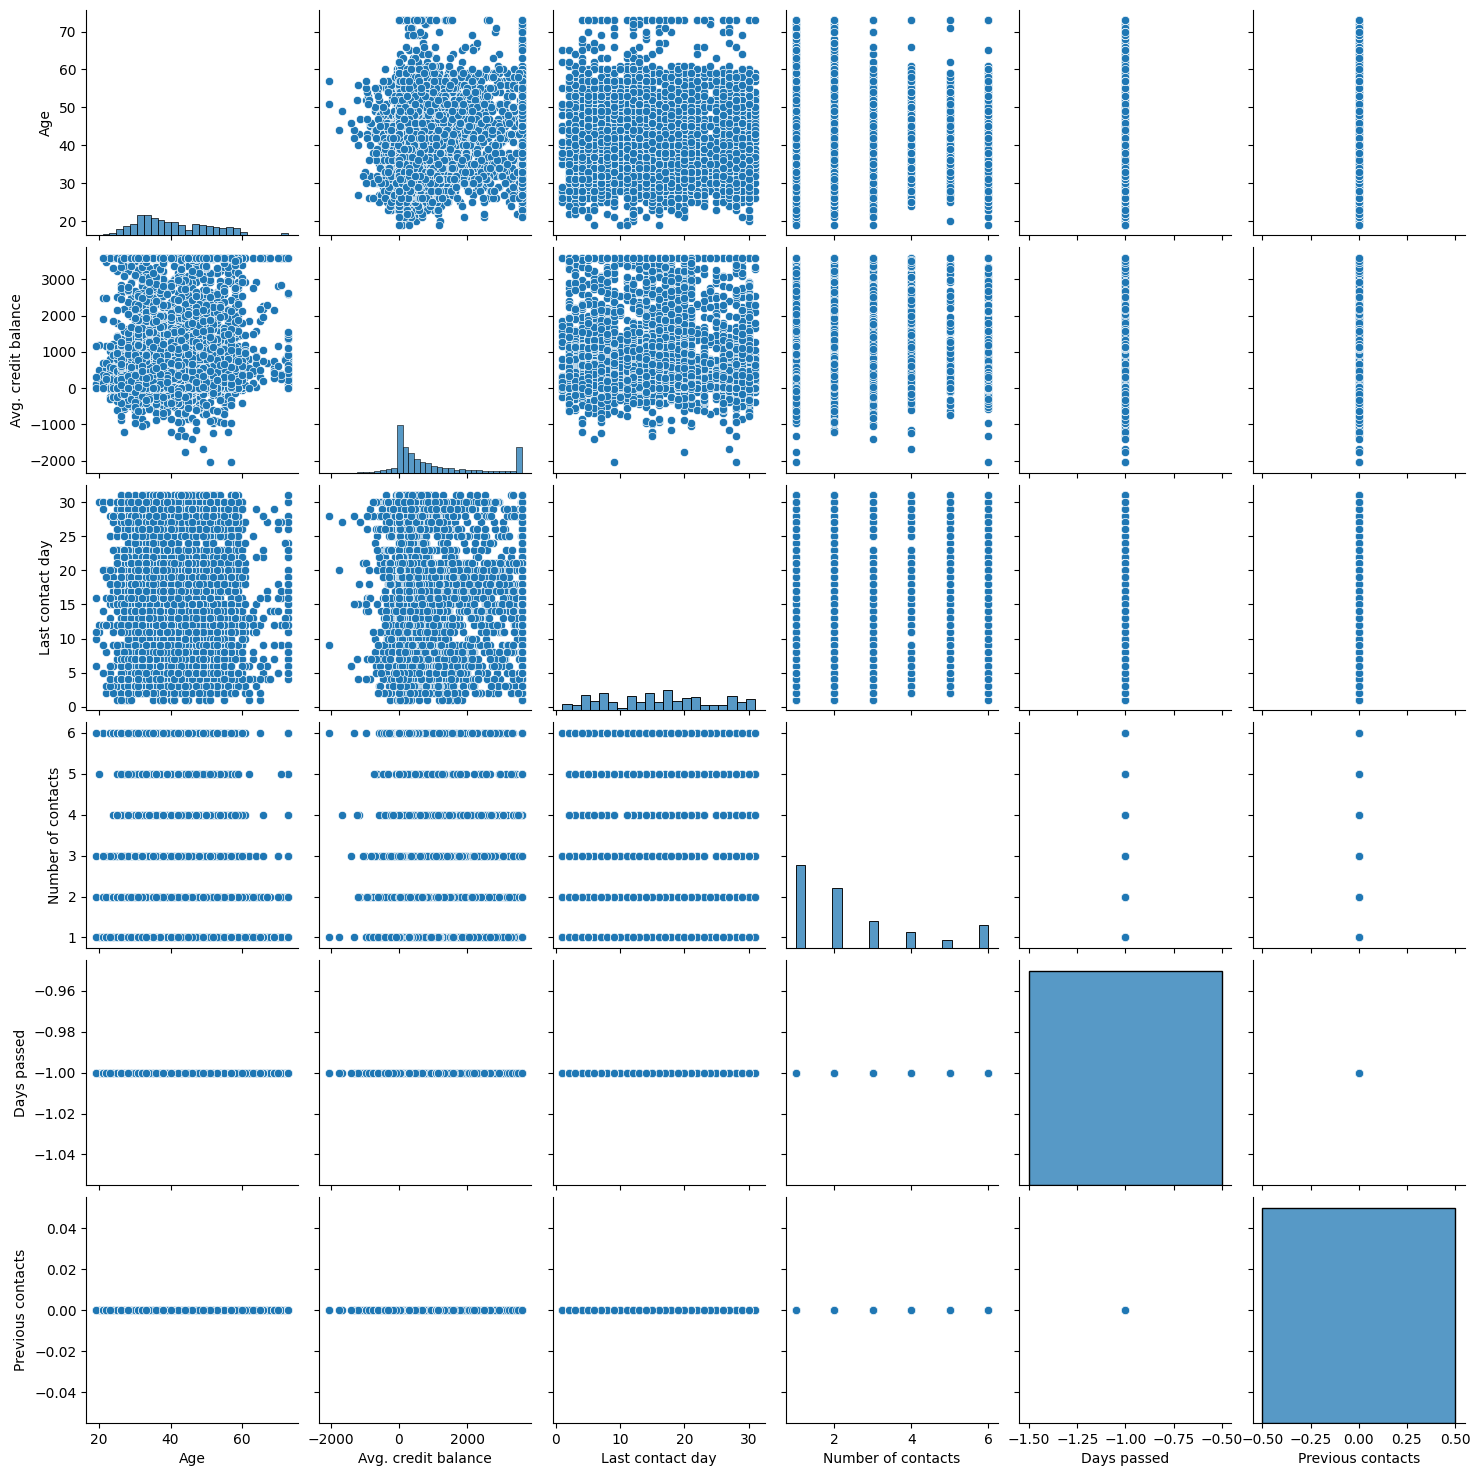

In [31]:
# Visualize relationships with a pairplot
sns.pairplot(pd_df)
plt.show()

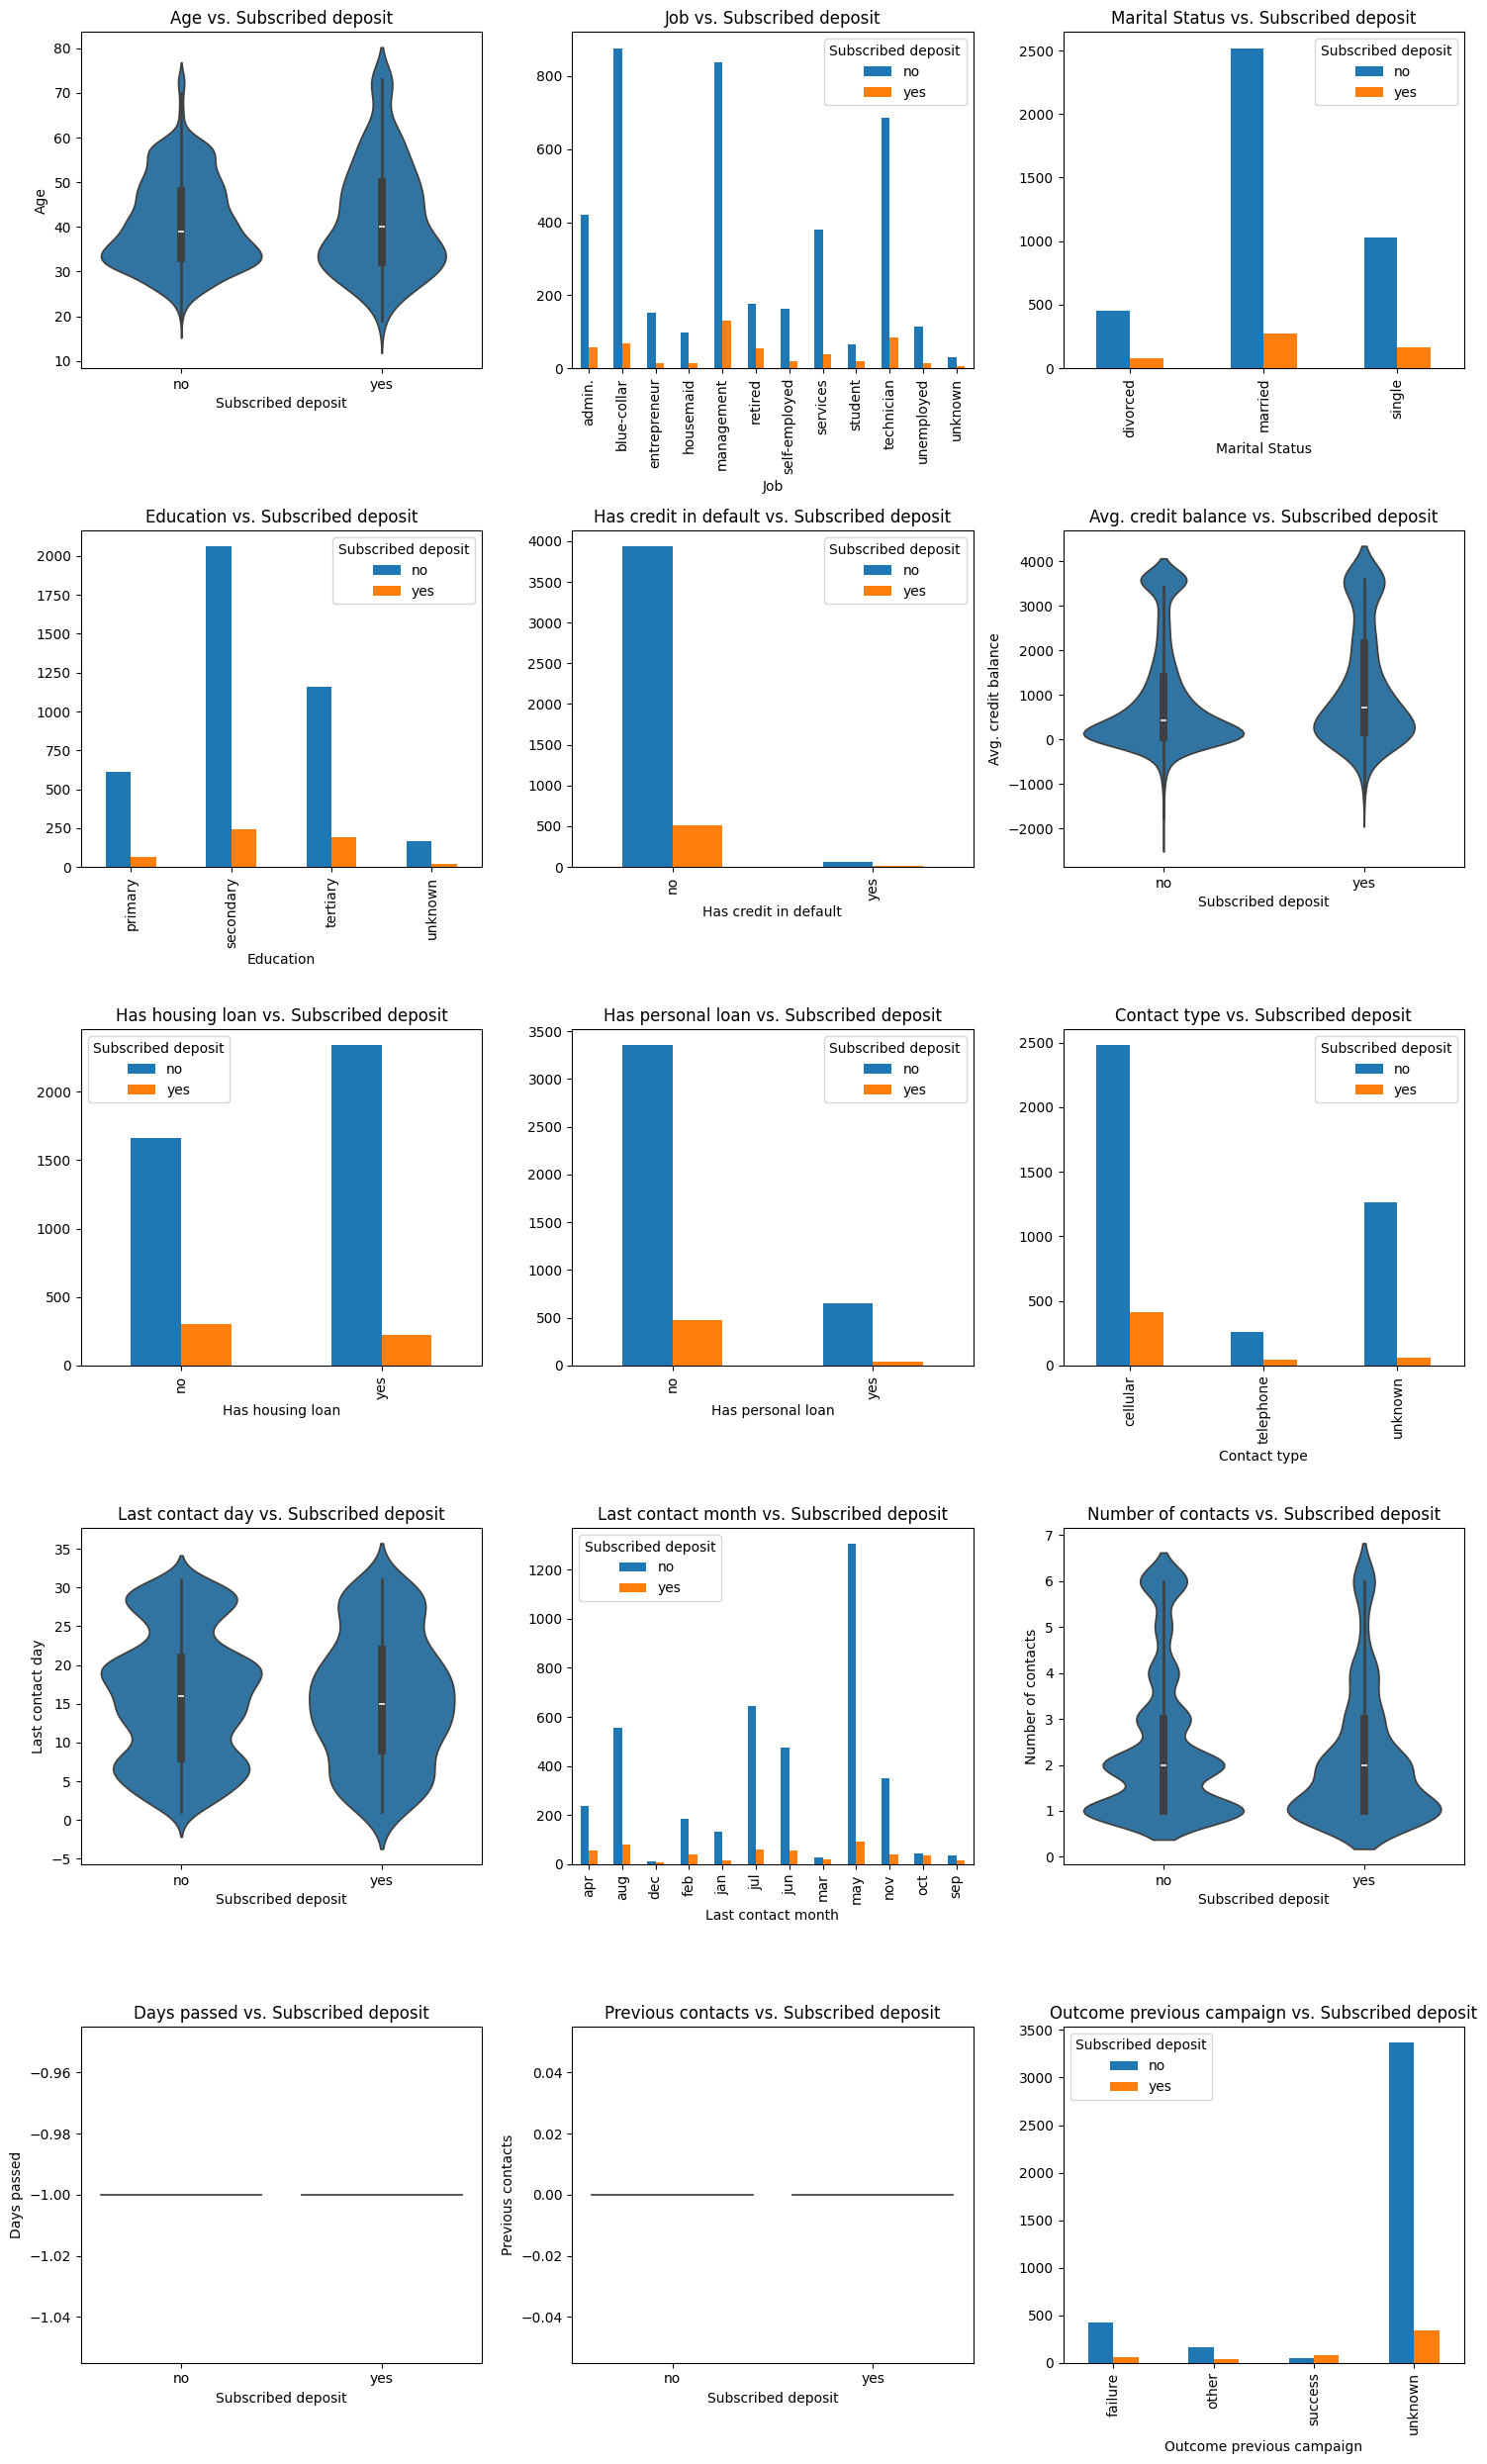

In [34]:
# Chart every variable against the target, Subscribed deposit

def plot_grid(df, target_col):
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns

    n_cols = 3
    n_rows = (len(df.columns) - 1 + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axes = axes.ravel()  # Flatten the axes array

    for i, col in enumerate(df.columns):
        if col != target_col:
          ax = axes[i]

          if col in num_cols:
              sns.violinplot(x=target_col, y=col, data=df, ax=ax)
          elif col in cat_cols:
              pd.crosstab(df[col],df[target_col]).plot(kind='bar', ax=ax)

          ax.set_title(f'{col} vs. {target_col}')

    # Turn off any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

plot_grid(pd_df, 'Subscribed deposit')


### Pre-processing

In [45]:
# Handle the outliers
numerical_features = pd_df.select_dtypes(include=np.number).columns

# Iterate through numerical features and handle outliers using IQR
for col in numerical_features:
    Q1 = pd_df[col].quantile(0.25)
    Q3 = pd_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers at the bounds
    pd_df[col] = np.where(pd_df[col] < lower_bound, lower_bound, pd_df[col])
    pd_df[col] = np.where(pd_df[col] > upper_bound, upper_bound, pd_df[col])


In [46]:
pd_df.describe(include='all')

,Age,Job,Marital Status,Education,Has credit in default,Avg. credit balance,Has housing loan,Has personal loan,Contact type,Last contact day,Last contact month,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Outcome previous campaign,Subscribed deposit
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.0,4521.0,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.123203,NaN,NaN,NaN,NaN,973.493696,NaN,NaN,NaN,15.915284,NaN,241.785667,2.412962,-1.0,0.0,NaN,NaN
std,10.416974,NaN,NaN,NaN,NaN,1240.356566,NaN,NaN,NaN,8.247667,NaN,185.397346,1.622028,0.0,0.0,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-2047.500000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.0,0.0,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.0,0.0,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.0,0.0,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.0,0.0,NaN,NaN


In [47]:
# Drop the last contact duration column
pd_df = pd_df.drop(columns=['Last contact duration (sec)'])
print(pd_df.columns) #verify that it was dropped

Index(['Age', 'Job', 'Marital Status', 'Education', 'Has credit in default',
       'Avg. credit balance', 'Has housing loan', 'Has personal loan',
       'Contact type', 'Last contact day', 'Last contact month',
       'Number of contacts', 'Days passed', 'Previous contacts',
       'Outcome previous campaign', 'Subscribed deposit'],
      dtype='object')


In [48]:
# Check for missing values
print(pd_df.isnull().sum())

Age                          0
Job                          0
Marital Status               0
Education                    0
Has credit in default        0
Avg. credit balance          0
Has housing loan             0
Has personal loan            0
Contact type                 0
Last contact day             0
Last contact month           0
Number of contacts           0
Days passed                  0
Previous contacts            0
Outcome previous campaign    0
Subscribed deposit           0
dtype: int64


In [49]:
# Identify duplicate rows based on all columns
duplicate_rows = pd_df[pd_df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Age, Job, Marital Status, Education, Has credit in default, Avg. credit balance, Has housing loan, Has personal loan, Contact type, Last contact day, Last contact month, Number of contacts, Days passed, Previous contacts, Outcome previous campaign, Subscribed deposit]
Index: []


In [50]:
y = pd_df['Subscribed deposit']

In [51]:
# Function to show target class distribution
def show_target_distribution(y, title="Target Class Distribution"):
    class_counts = y.value_counts()
    total = len(y)
    print(f"\n{title}:")
    for class_label, count in class_counts.items():
        percentage = (count / total) * 100
        print(f"Class {class_label}: {count} ({percentage:.2f}%)")

# Show original target distribution
show_target_distribution(y, "Original Target Class Distribution")


Original Target Class Distribution:
Class no: 4000 (88.48%)
Class yes: 521 (11.52%)


In [52]:
# Encode the categorical variables
y = LabelEncoder().fit_transform(y)

X = pd_df.drop('Subscribed deposit', axis=1)
X = pd.get_dummies(X)

In [53]:
 #check out the features
X

,Age,Avg. credit balance,Last contact day,Number of contacts,Days passed,Previous contacts,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Last contact month_jun,Last contact month_mar,Last contact month_may,Last contact month_nov,Last contact month_oct,Last contact month_sep,Outcome previous campaign_failure,Outcome previous campaign_other,Outcome previous campaign_success,Outcome previous campaign_unknown
0,30.0,1787.0,19.0,1.0,-1.0,0.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,33.0,3596.5,11.0,1.0,-1.0,0.0,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,35.0,1350.0,16.0,1.0,-1.0,0.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,30.0,1476.0,3.0,4.0,-1.0,0.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,59.0,0.0,5.0,1.0,-1.0,0.0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,30.0,5.0,-1.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4517,57.0,-2047.5,9.0,1.0,-1.0,0.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4518,57.0,295.0,19.0,6.0,-1.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4519,28.0,1137.0,6.0,4.0,-1.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [54]:
y # verify that this was binarized properly

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(3616, 50)

In [57]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show target distribution after SMOTE
show_target_distribution(pd.Series(y_train_resampled), "Training Set After SMOTE")
show_target_distribution(pd.Series(y_test), "Test Set Distribution (Unchanged)")


Training Set After SMOTE:
Class 0: 3193 (50.00%)
Class 1: 3193 (50.00%)

Test Set Distribution (Unchanged):
Class 0: 807 (89.17%)
Class 1: 98 (10.83%)


In [58]:
# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Ensemble Models

In [59]:
#function to evaluate models
def evaluate_model(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    return sensitivity, specificity, accuracy, balanced_accuracy

## Bagging (Random Forest)

In [60]:
# Preliminary Random Forest Model (Bagging approach)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)
rf_pred = rf_clf.predict(X_test)
rf_results = evaluate_model(y_test, rf_pred)
print(rf_results)

(np.float64(0.17346938775510204), np.float64(0.9801734820322181), 0.8928176795580111, np.float64(0.5768214348936601))


In [61]:
# Hyperparameter Tuning

# Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the grid search with cross-validation
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           rf_param_grid, cv=3,
                           scoring='recall',
                           verbose=1)
rf_grid_search.fit(X_train, y_train)

# Best model and its parameters
best_rf = rf_grid_search.best_estimator_
print("Best parameters:", rf_grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [62]:
best_rf_pred = best_rf.predict(X_test)
best_rf_results = evaluate_model(y_test, best_rf_pred)
print(best_rf_results)

(np.float64(0.11224489795918367), np.float64(0.9876084262701363), 0.8928176795580111, np.float64(0.54992666211466))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Boosting (Gradient Boosting)

In [65]:
# Gradient Boosting (Boosting approach)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_resampled, y_train_resampled)
gb_pred = gb_clf.predict(X_test)
gb_results = evaluate_model(y_test, gb_pred)
gb_results

(np.float64(0.21428571428571427),
 np.float64(0.9739776951672863),
 0.8917127071823204,
 np.float64(0.5941317047265002))

In [67]:
# Hyperparameter Tuning

# Define parameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Set up the grid search with cross-validation
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           gb_param_grid, cv=3,
                           scoring='balanced_accuracy',
                           verbose=1)
gb_grid_search.fit(X_train, y_train)

# Best model and its parameters
best_gb = gb_grid_search.best_estimator_
print("Best parameters:", gb_grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [68]:
best_gb_pred = best_gb.predict(X_test)
best_gb_results = evaluate_model(y_test, best_gb_pred)
best_gb_results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


(np.float64(0.7244897959183674),
 np.float64(0.3903345724907063),
 0.4265193370165746,
 np.float64(0.5574121842045369))

## Stacking (RF + GB + Decision Trees)

In [69]:
# Stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20,
                                  max_features= 'sqrt', min_samples_leaf =1,
                                  min_samples_split = 2,  random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators= 100, max_depth= 5,
                                      learning_rate = 0.2, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_clf.fit(X_train_resampled, y_train_resampled)
stacking_pred = stacking_clf.predict(X_test)
stacking_results = evaluate_model(y_test, stacking_pred)

In [70]:
stacking_results

(np.float64(0.20408163265306123),
 np.float64(0.966542750929368),
 0.8839779005524862,
 np.float64(0.5853121917912146))

# Results

In [72]:
# Print results
print("\n Untuned Random Forest Results:")
print(f"Sensitivity: {rf_results[0]:.4f}")
print(f"Specificity: {rf_results[1]:.4f}")
print(f"Accuracy: {rf_results[2]:.4f}")
print(f"Balanced Accuracy: {rf_results[3]:.4f}")
print("\nTuned Random Forest Results:")
print(f"Sensitivity: {best_rf_results[0]:.4f}")
print(f"Specificity: {best_rf_results[1]:.4f}")
print(f"Accuracy: {best_rf_results[2]:.4f}")
print(f"Balanced Accuracy: {best_rf_results[3]:.4f}")
print("\n Untuned Gradient Boosting Results:")
print(f"Sensitivity: {gb_results[0]:.4f}")
print(f"Specificity: {gb_results[1]:.4f}")
print(f"Accuracy: {gb_results[2]:.4f}")
print(f"Balanced Accuracy: {gb_results[3]:.4f}")
print("\n Tuned Gradient Boosting Results:")
print(f"Sensitivity: {best_gb_results[0]:.4f}")
print(f"Specificity: {best_gb_results[1]:.4f}")
print(f"Accuracy: {best_gb_results[2]:.4f}")
print(f"Balanced Accuracy: {best_gb_results[3]:.4f}")
print("\nStacking Results:")
print(f"Sensitivity: {stacking_results[0]:.4f}")
print(f"Specificity: {stacking_results[1]:.4f}")
print(f"Accuracy: {stacking_results[2]:.4f}")
print(f"Balanced Accuracy: {stacking_results[3]:.4f}")


 Untuned Random Forest Results:
Sensitivity: 0.1735
Specificity: 0.9802
Accuracy: 0.8928
Balanced Accuracy: 0.5768

Tuned Random Forest Results:
Sensitivity: 0.1122
Specificity: 0.9876
Accuracy: 0.8928
Balanced Accuracy: 0.5499

 Untuned Gradient Boosting Results:
Sensitivity: 0.2143
Specificity: 0.9740
Accuracy: 0.8917
Balanced Accuracy: 0.5941

 Tuned Gradient Boosting Results:
Sensitivity: 0.7245
Specificity: 0.3903
Accuracy: 0.4265
Balanced Accuracy: 0.5574

Stacking Results:
Sensitivity: 0.2041
Specificity: 0.9665
Accuracy: 0.8840
Balanced Accuracy: 0.5853
